In [31]:
greetings = "Assalam-o-Alaikum!"
greetings

'Assalam-o-Alaikum!'

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**1)** Create an empty list called **gamers**. This will be your list of people who are attending game night.

In [33]:
gamers = []

**2)** Now we want to create a function that will update this list and add a new gamer to the this gamers list

In [34]:
def add_gamers(gamer, gamers):
    gamers.append(gamer)

**3)** Create a dictionary called **kimberly** with the **name** and **availability**.

In [35]:
kimberly = {"name": "Kimberly Warner", "availability": ["Monday", "Tuesday", "Friday"]}
kimberly

{'name': 'Kimberly Warner', 'availability': ['Monday', 'Tuesday', 'Friday']}

**4)** Call **add_gamer** with **kimberly** as the first argument and **gamers** as the second

In [36]:
add_gamers(kimberly, gamers)
gamers

[{'name': 'Kimberly Warner', 'availability': ['Monday', 'Tuesday', 'Friday']}]

**5)** Let's add a couple more **gamers** to the list!

In [37]:
add_gamers({'name':'Thomas Nelson','availability': ["Tuesday", "Thursday", "Saturday"]}, gamers)
add_gamers({'name':'Joyce Sellers','availability': ["Monday", "Wednesday", "Friday", "Saturday"]}, gamers)
add_gamers({'name':'Michelle Reyes','availability': ["Wednesday", "Thursday", "Sunday"]}, gamers)
add_gamers({'name':'Stephen Adams','availability': ["Thursday", "Saturday"]}, gamers)
add_gamers({'name': 'Joanne Lynn', 'availability': ["Monday", "Thursday"]}, gamers)
add_gamers({'name':'Latasha Bryan','availability': ["Monday", "Sunday"]}, gamers)
add_gamers({'name':'Crystal Brewer','availability': ["Thursday", "Friday", "Saturday"]}, gamers)
add_gamers({'name':'James Barnes Jr.','availability': ["Tuesday", "Wednesday", "Thursday", "Sunday"]}, gamers)
add_gamers({'name':'Michel Trujillo','availability': ["Monday", "Tuesday", "Wednesday"]}, gamers)

In [38]:
pd.DataFrame(gamers)

,name,availability
0,Kimberly Warner,"[Monday, Tuesday, Friday]"
1,Thomas Nelson,"[Tuesday, Thursday, Saturday]"
2,Joyce Sellers,"[Monday, Wednesday, Friday, Saturday]"
3,Michelle Reyes,"[Wednesday, Thursday, Sunday]"
4,Stephen Adams,"[Thursday, Saturday]"
5,Joanne Lynn,"[Monday, Thursday]"
6,Latasha Bryan,"[Monday, Sunday]"
7,Crystal Brewer,"[Thursday, Friday, Saturday]"
8,James Barnes Jr.,"[Tuesday, Wednesday, Thursday, Sunday]"
9,Michel Trujillo,"[Monday, Tuesday, Wednesday]"


**6)** Create a function called **build_daily_frequency_table** that takes no argument returns a dictionary with the days of the week as keys and 0s for values. We'll be using this to count the availability per night. Call **build_daily_frequency_table** and save the results to a variable called **count_availability.**

In [39]:
def build_daily_frequency_table():
    return {
        "Monday":    0,
        "Tuesday":   0,
        "Wednesday": 0,
        "Thursday":  0,
        "Friday":    0,
        "Saturday":  0,
        "Sunday":    0,
    }

count_availability = build_daily_frequency_table()

**7)** Write a function called **calculate_availability** that takes a list of gamers as an argument **gamers** and a frequency table **count_availability**. The function should iterate through each gamer in **gamers** and iterate through each day in the gamer's availability. For each day in the gamer's availability, add one to that date on the frequency table.

In [40]:
def calculate_availability(gamers, count_availability):
    for gamer in gamers:
        for day in gamer["availability"]:
            count_availability[day] += 1

**8)** Call **calculate_availability** with **gamers** and **count_availability**. Print out **count_availability** afterwards

In [41]:
calculate_availability(gamers, count_availability)
print(count_availability)

{'Monday': 5, 'Tuesday': 4, 'Wednesday': 4, 'Thursday': 6, 'Friday': 3, 'Saturday': 4, 'Sunday': 3}


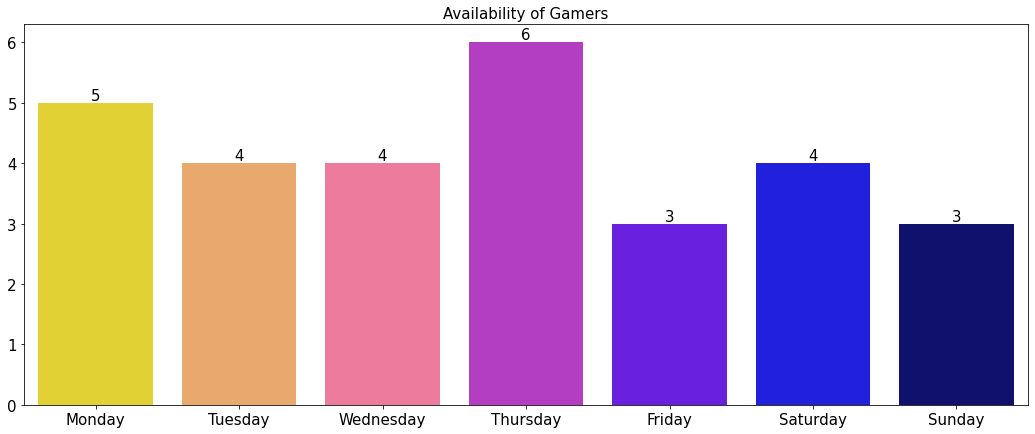

In [42]:
availability = pd.DataFrame([count_availability]).T.reset_index()
availability.columns = ["Day", "Availability"]
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Day", y = "Availability", data = availability, palette = "gnuplot2_r")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.4, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Availability of Gamers", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)

plt.show()

**9)** Write a function **find_best_night** that takes a dictionary **availability_table** and returns the key with the highest number.

In [43]:
def find_best_night(availability_table):
    best_availability = 0
    for day, availability in availability_table.items():
        if availability > best_availability:
            best_night = day
            best_availability = availability
    return best_night

**10)** Call **find_best_night** with **count_availability**, store the result in a variable called **game_night**. Print out **game_night** to find out which day it is.

In [44]:
game_night = find_best_night(count_availability)
game_night

'Thursday'

**11)** let's make a list of all of the people who are available that night.

In [45]:
def available_on_night(gamers, day):
    return [gamer for gamer in gamers if day in gamer["availability"]]

In [46]:
attending_game_night = available_on_night(gamers, game_night)
pd.DataFrame(attending_game_night)

,name,availability
0,Thomas Nelson,"[Tuesday, Thursday, Saturday]"
1,Michelle Reyes,"[Wednesday, Thursday, Sunday]"
2,Stephen Adams,"[Thursday, Saturday]"
3,Joanne Lynn,"[Monday, Thursday]"
4,Crystal Brewer,"[Thursday, Friday, Saturday]"
5,James Barnes Jr.,"[Tuesday, Wednesday, Thursday, Sunday]"


**12)** Generating an E-mail for the Participants

In [47]:
from_email = """
Dear {name},

The Sorcery Society is happy to host "{game}" night and wishes you will attend. Come by on {day_of_week} and have a blast!

Magically Yours,
the Sorcery Society
"""

In [48]:
def send_email(gamers, day, game):
    for gamer in gamers:
        print(from_email.format(name = gamer["name"], day_of_week = day, game = game))

In [49]:
send_email(attending_game_night, game_night, "Abruptly Goblins")


Dear Thomas Nelson,

The Sorcery Society is happy to host "Abruptly Goblins" night and wishes you will attend. Come by on Thursday and have a blast!

Magically Yours,
the Sorcery Society


Dear Michelle Reyes,

The Sorcery Society is happy to host "Abruptly Goblins" night and wishes you will attend. Come by on Thursday and have a blast!

Magically Yours,
the Sorcery Society


Dear Stephen Adams,

The Sorcery Society is happy to host "Abruptly Goblins" night and wishes you will attend. Come by on Thursday and have a blast!

Magically Yours,
the Sorcery Society


Dear Joanne Lynn,

The Sorcery Society is happy to host "Abruptly Goblins" night and wishes you will attend. Come by on Thursday and have a blast!

Magically Yours,
the Sorcery Society


Dear Crystal Brewer,

The Sorcery Society is happy to host "Abruptly Goblins" night and wishes you will attend. Come by on Thursday and have a blast!

Magically Yours,
the Sorcery Society


Dear James Barnes Jr.,

The Sorcery Society is happy t

**12)** You feel bad for the folks who **weren't able** to attend on the decided upon **game night**, and try to use your currently written methods to have a second game night of the week

In [50]:
unable_to_attend_best_night = [gamer for gamer in gamers if game_night not in gamer["availability"]]
second_night_availability = build_daily_frequency_table()
calculate_availability(unable_to_attend_best_night, second_night_availability)
second_night = find_best_night(second_night_availability)

In [51]:
available_second_game_night = available_on_night(gamers, second_night)
send_email(available_second_game_night, second_night, "Abruptly Goblins!")


Dear Kimberly Warner,

The Sorcery Society is happy to host "Abruptly Goblins!" night and wishes you will attend. Come by on Monday and have a blast!

Magically Yours,
the Sorcery Society


Dear Joyce Sellers,

The Sorcery Society is happy to host "Abruptly Goblins!" night and wishes you will attend. Come by on Monday and have a blast!

Magically Yours,
the Sorcery Society


Dear Joanne Lynn,

The Sorcery Society is happy to host "Abruptly Goblins!" night and wishes you will attend. Come by on Monday and have a blast!

Magically Yours,
the Sorcery Society


Dear Latasha Bryan,

The Sorcery Society is happy to host "Abruptly Goblins!" night and wishes you will attend. Come by on Monday and have a blast!

Magically Yours,
the Sorcery Society


Dear Michel Trujillo,

The Sorcery Society is happy to host "Abruptly Goblins!" night and wishes you will attend. Come by on Monday and have a blast!

Magically Yours,
the Sorcery Society

